 <h1 style='text-align: center;'>Naturo Intelligent Farming
 <h1 style='text-align: right;'>fields are future..........

# Introduction
1. India is one among the oldest countries which is still practicing agriculture. But in recent times the trends in agriculture has drastically evolved due to globalization. Various factors have affected the health of agriculture in India. Many new technologies have been evolved to regain the health. One such technique is precision agriculture. Precision agriculture is budding in India .Precision agriculture is the technology of “site-specific” farming
2. Precision agriculture is a modern farming technique that uses research data of soil characteristics, soil types, crop yield data collection and suggests the farmers the right crop based on their sitespecific parameters. 
3. This reduces the wrong choice on a crop and increase in productivity. 

# Considered parameters:
1. N
2. P
3. K
4. temperature
5. humidity
6. ph
7. rainfall	
8. crop names

# Learners Used in the Model:
1. Logistic Regression
2. Decision tree.

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# importing the dataset
data=pd.read_csv("Crop_recommendation.csv") 
df=data.copy()

### Exploratory data-analysis

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
df.size

17600

In [6]:
df["label"].value_counts().sum()

2200

In [7]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
df.corr()["P"].sort_values()

N             -0.231460
ph            -0.138019
temperature   -0.127541
humidity      -0.118734
rainfall      -0.063839
K              0.736232
P              1.000000
Name: P, dtype: float64

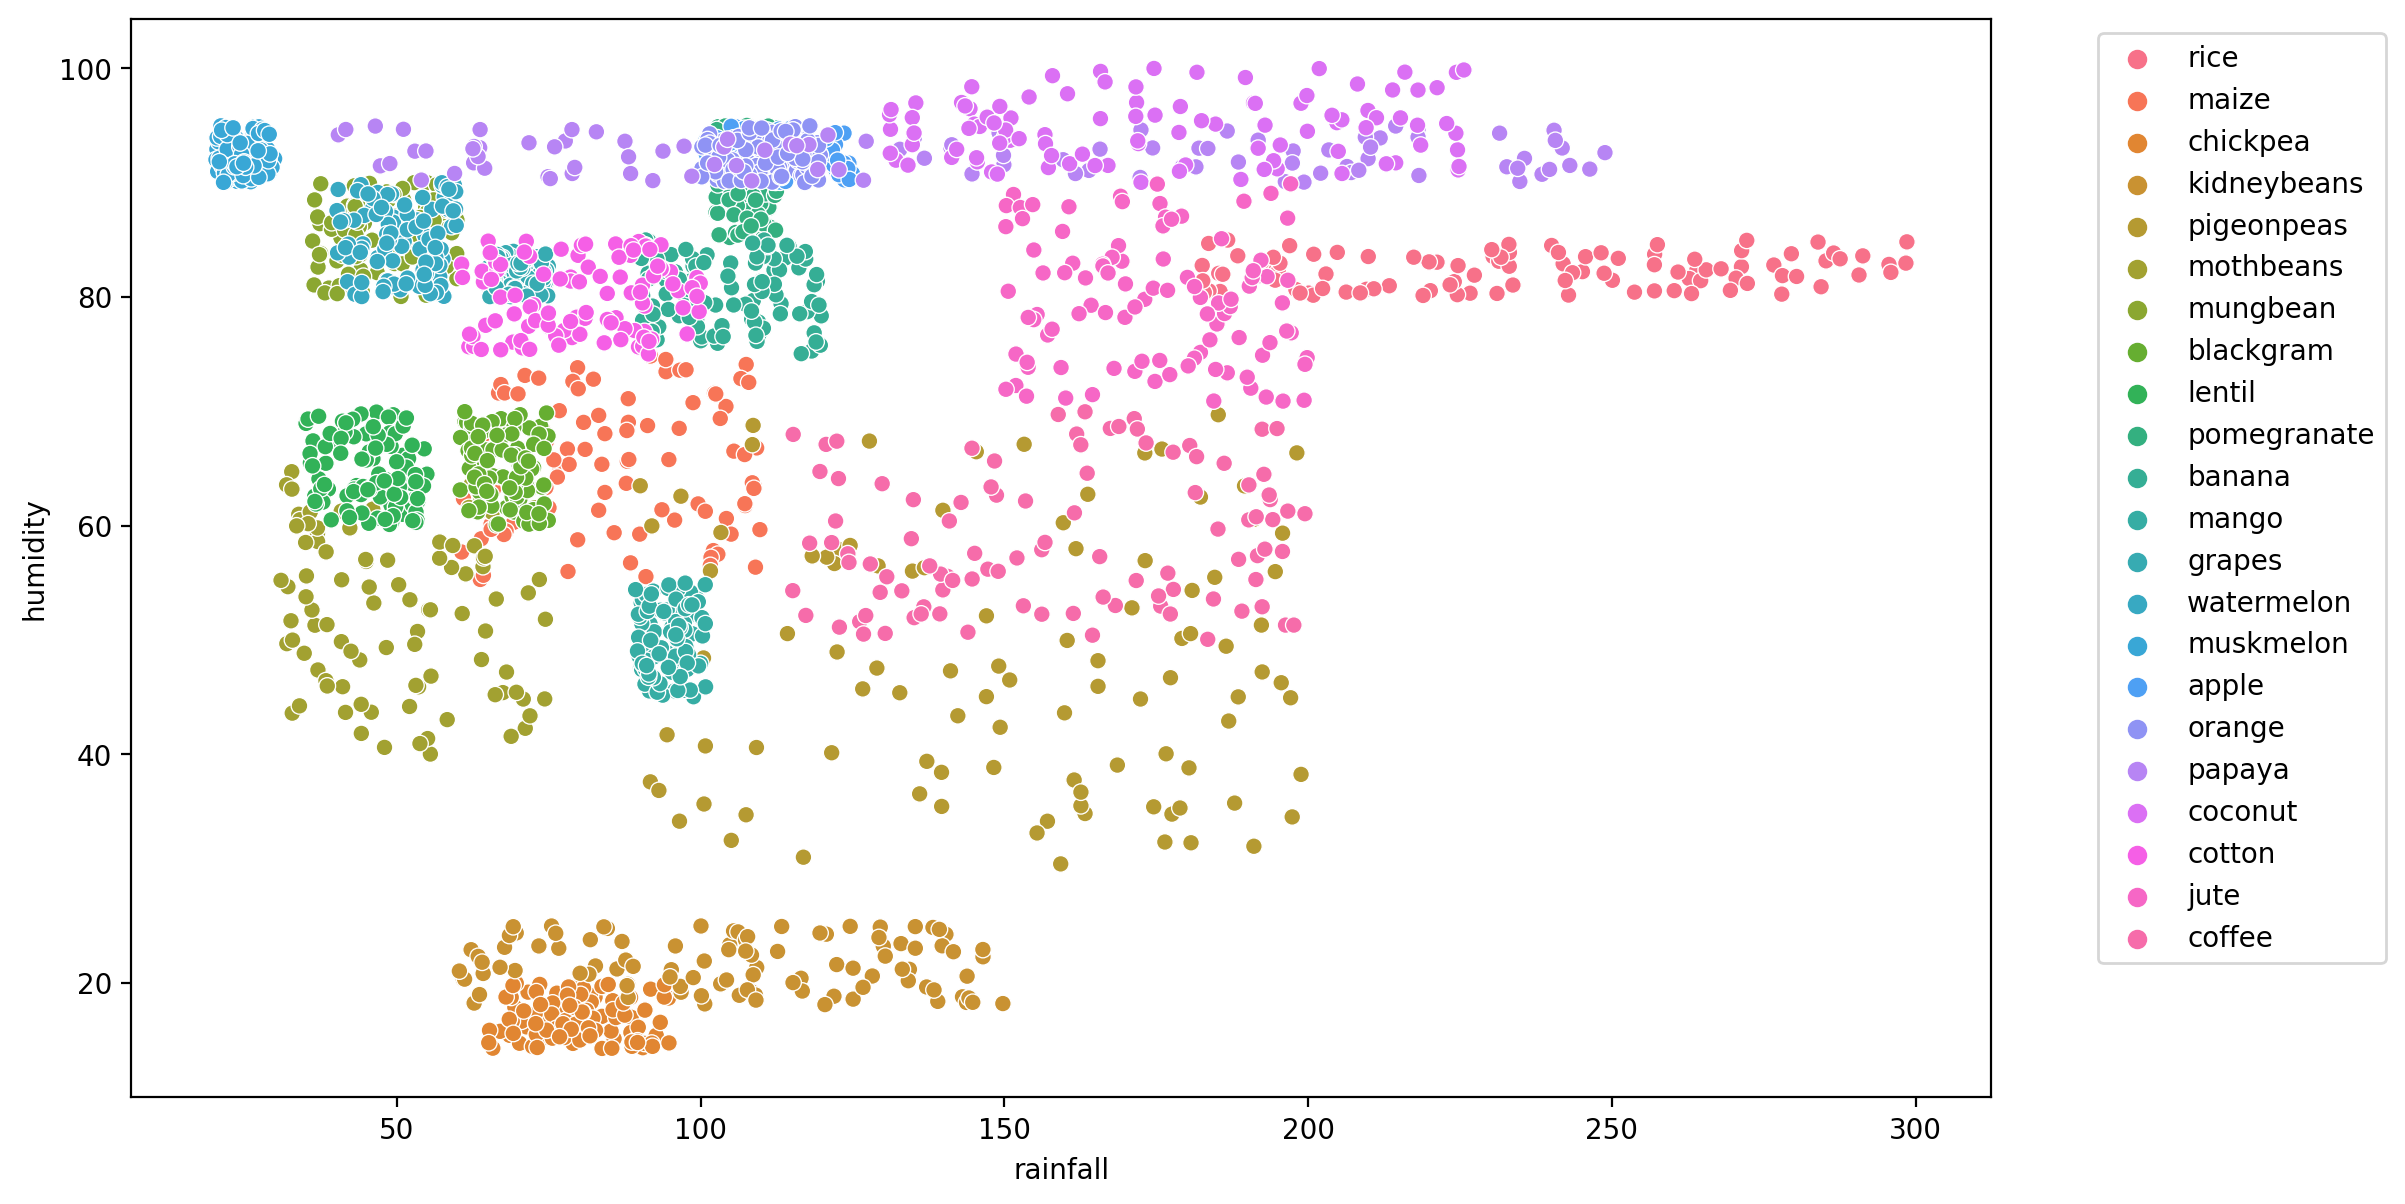

In [9]:
plt.figure(figsize=(12,7),dpi=200)
sns.scatterplot(data=df,y="humidity",x="rainfall",hue="label")
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.show()

In [10]:
#checking of null values
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

<AxesSubplot:xlabel='ph', ylabel='Count'>

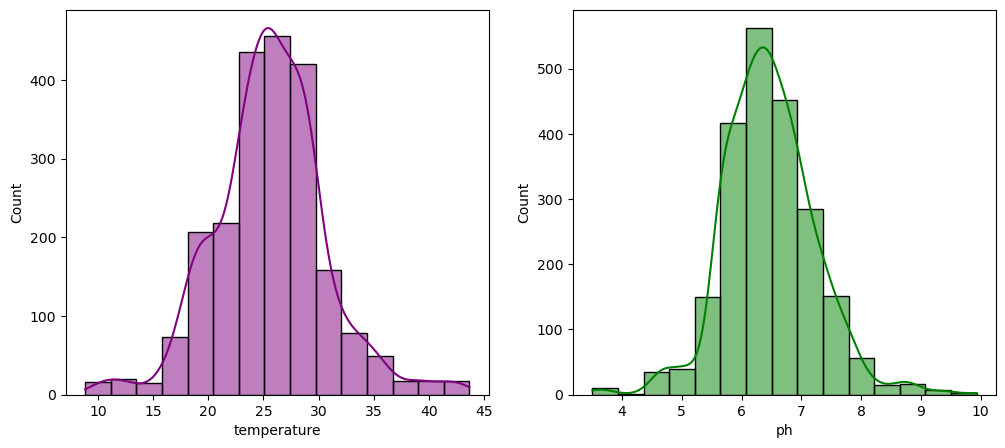

In [11]:
#to check balancing of dataset
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.histplot(df['temperature'],color="purple",bins=15,kde=True)
plt.subplot(1, 2, 2)
sns.histplot(df['ph'],color="green",bins=15,kde=True)

<AxesSubplot:xlabel='count', ylabel='label'>

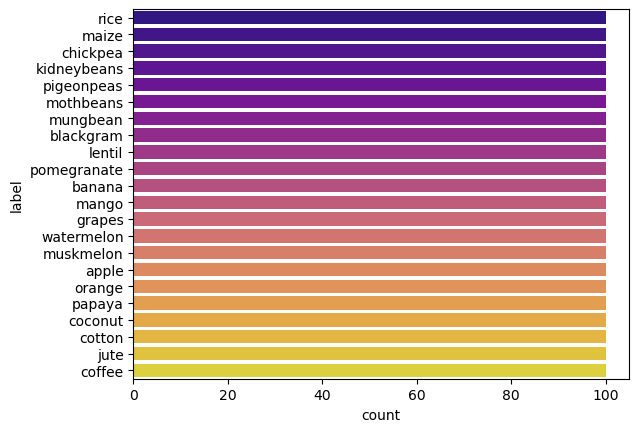

In [12]:
# to visualize how classes differ from each other in a particular space.
sns.countplot(y='label',data=df, palette="plasma")

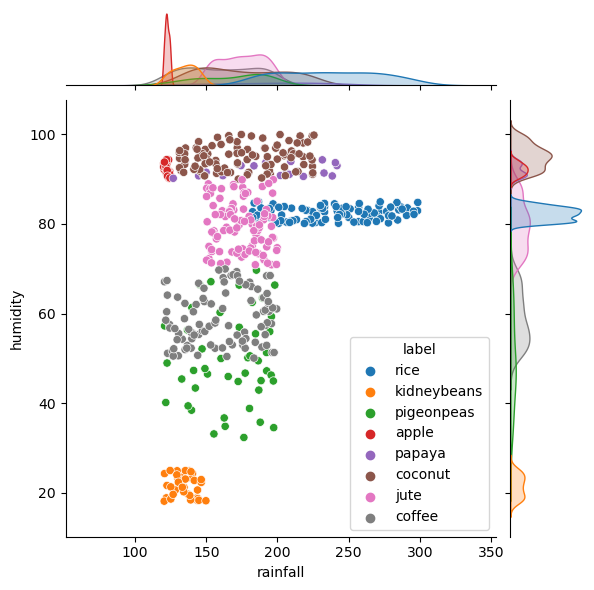

In [13]:
# to analyze dependency of rainfall and humidity
sns.jointplot(x="rainfall",y="humidity",data=df[(df['temperature']<30) & (df['rainfall']>120)],hue="label")

# conclusions
## 1. Coconut needs high humidity
## 2. Rice needs heavy rainfall (>200 mm) and a humidity above 80%
## 3.  Apple needs high humidity >90% and rainfall between 100 to 125 mm

In [14]:
crop_mean_data=pd.pivot_table(df,index=['label'],aggfunc='mean')

crop_mean_data

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


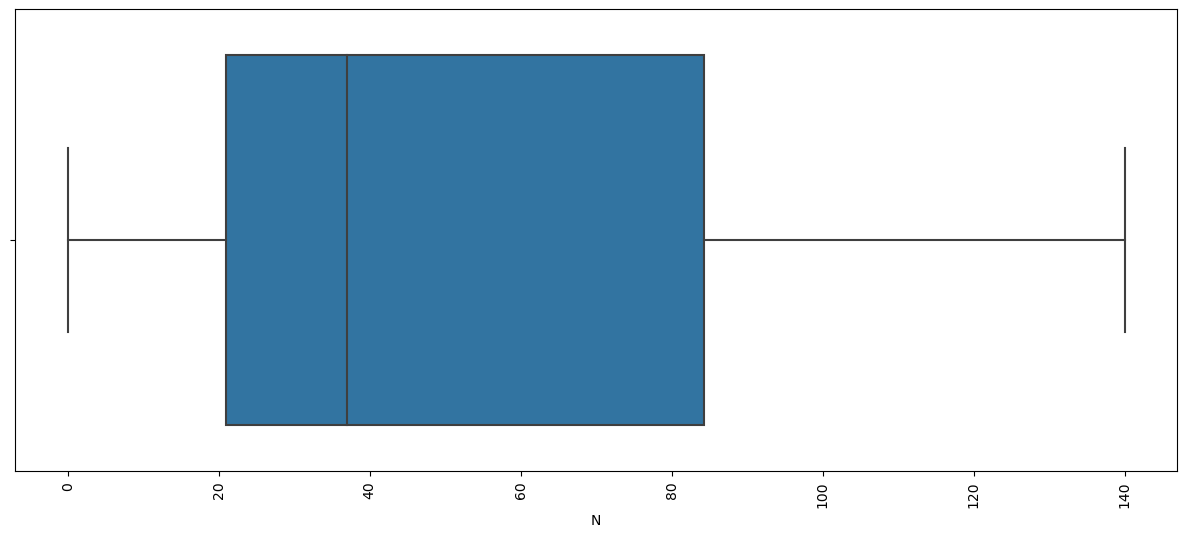

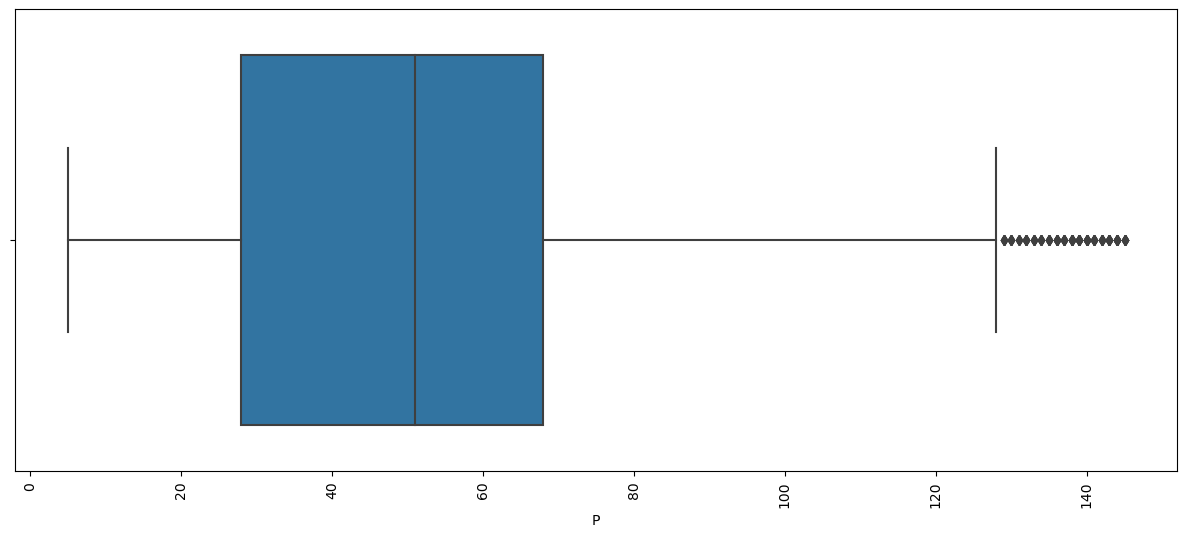

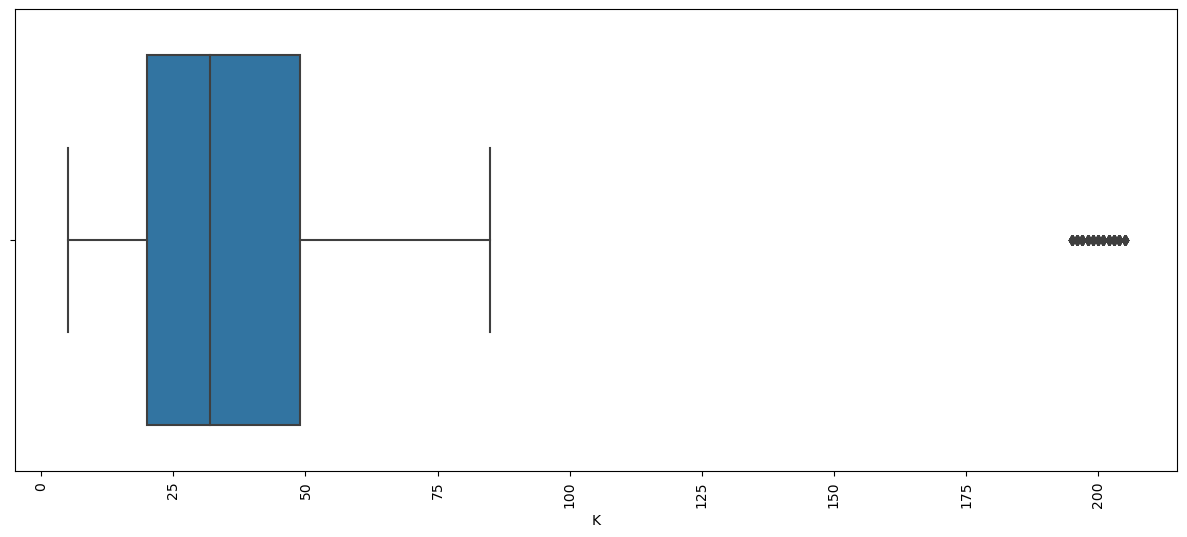

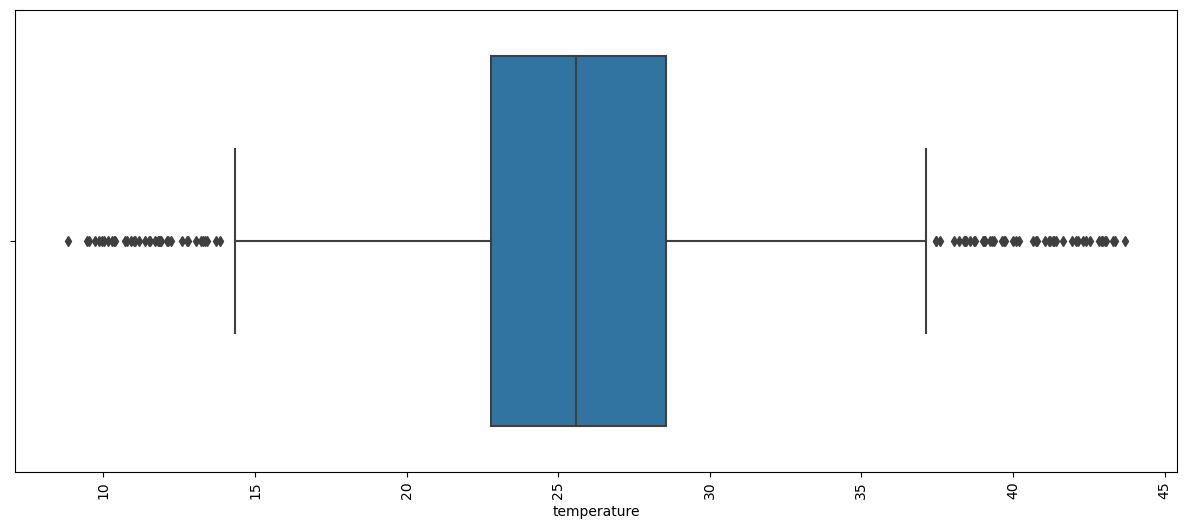

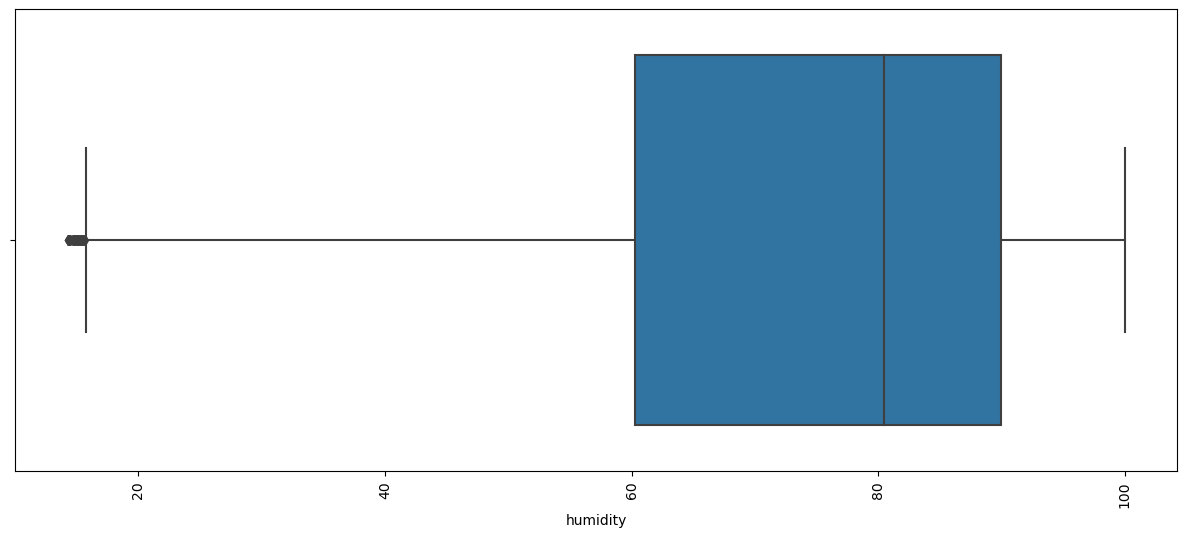

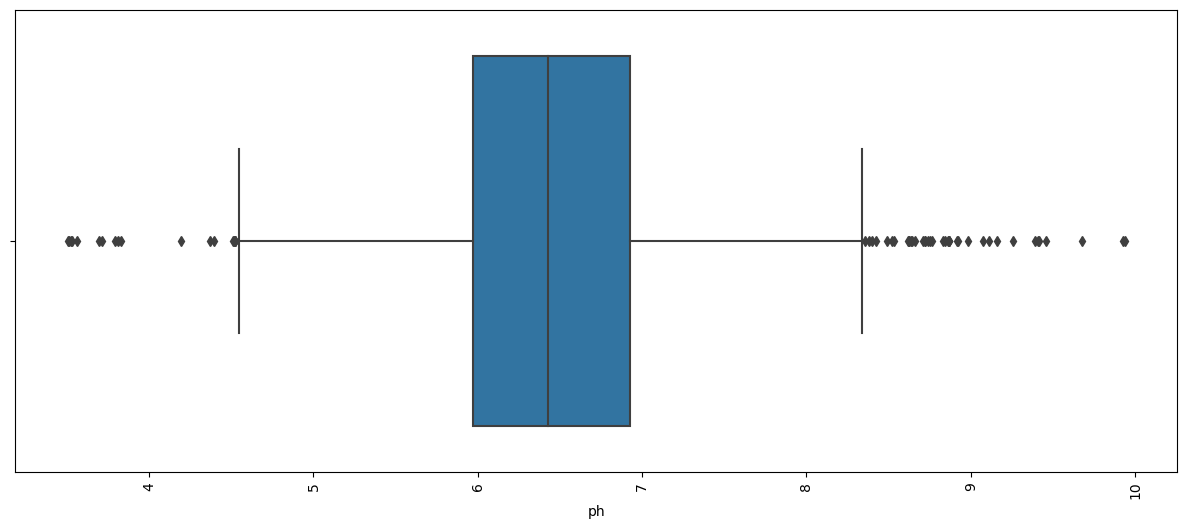

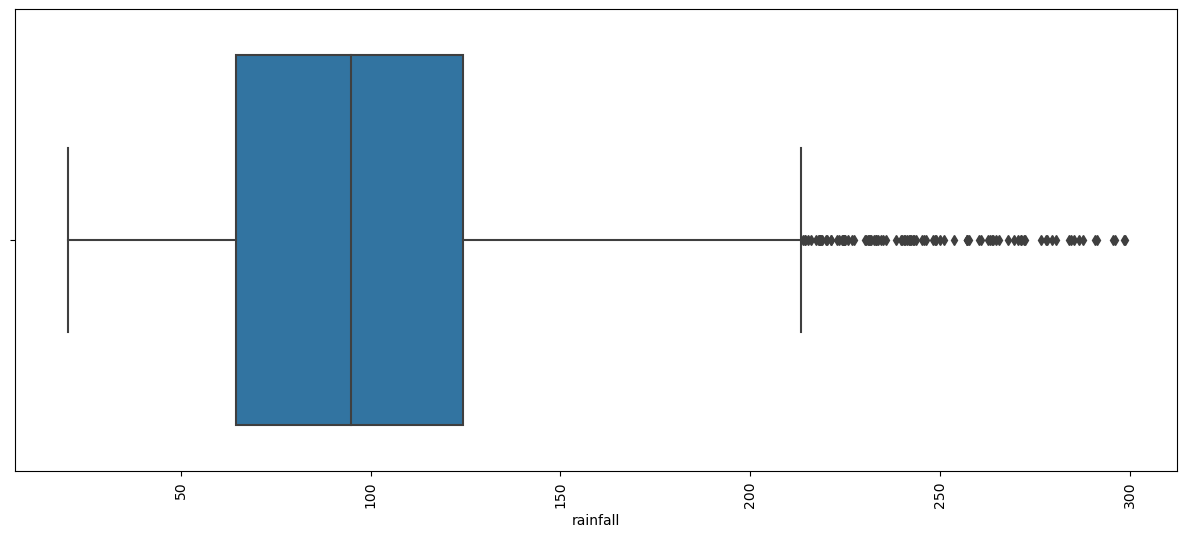

In [27]:
gpdata=df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
for i in gpdata.columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(x=gpdata[i])
    plt.xticks(rotation=90)
    plt.show()

In [28]:
print(np.where(df['rainfall']>220)) # print the outlier values of array


(array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   15,   16,   18,   19,   21,   23,   24,   25,   26,   27,
         28,   30,   32,   33,   34,   36,   37,   38,   39,   40,   43,
         44,   47,   49,   53,   54,   55,   57,   59,   60,   61,   62,
         64,   67,   68,   69,   71,   72,   74,   75,   76,   82,   84,
         85,   86,   88,   89,   90,   91,   93,   94,   96,   97, 1700,
       1703, 1712, 1723, 1726, 1758, 1759, 1778, 1783, 1784, 1787, 1793,
       1797, 1800, 1801, 1849, 1859, 1865, 1881, 1892, 1894], dtype=int64),)


In [29]:
Q1=np.percentile(df['rainfall'],25,interpolation='midpoint')
Q3=np.percentile(df['rainfall'],75,interpolation='midpoint')
IQR=Q3-Q1
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR

In [30]:
x=df[df['rainfall']>upper_bound]
x['label'].unique()

array(['rice', 'papaya', 'coconut'], dtype=object)

In [31]:
print(df.iloc[1000])

N                     91
P                     94
K                     46
temperature    29.367924
humidity       76.249001
ph              6.149934
rainfall       92.828409
label             banana
Name: 1000, dtype: object


In [32]:
crop_summary_new=crop_mean_data.reset_index()

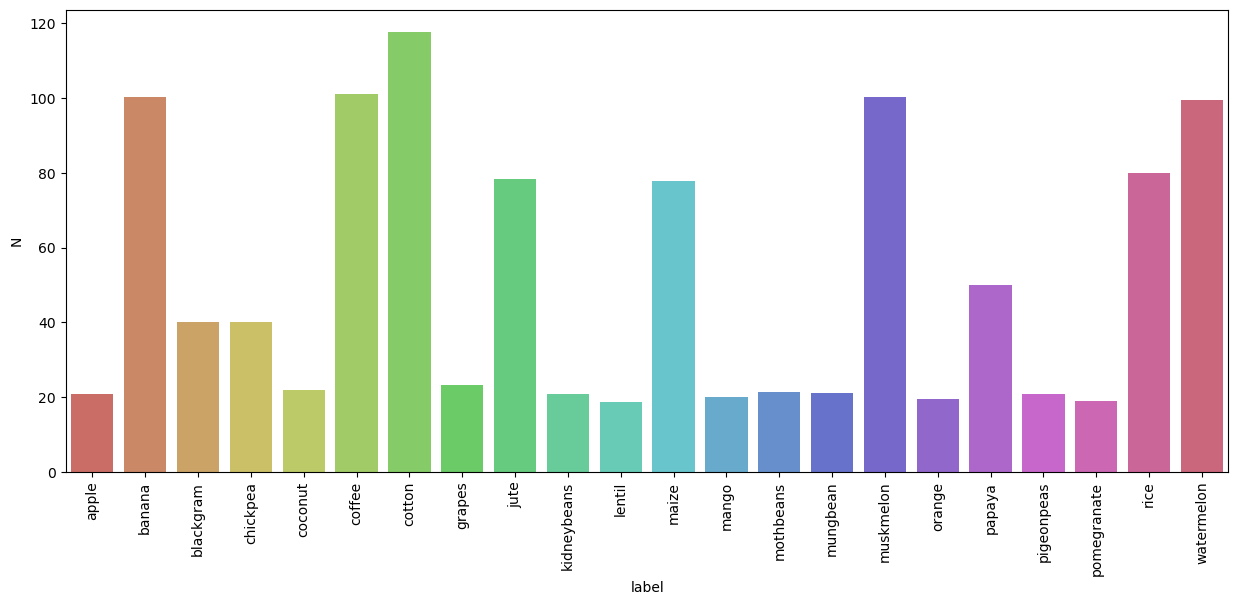

In [33]:
plt.figure(figsize=(15,6))
Npt=sns.barplot(y='N',x='label',data=crop_summary_new,palette='hls')
plt.xticks(rotation=90)
plt.show()
for i in Npt.containers:
    Npt.bar_label(i,)

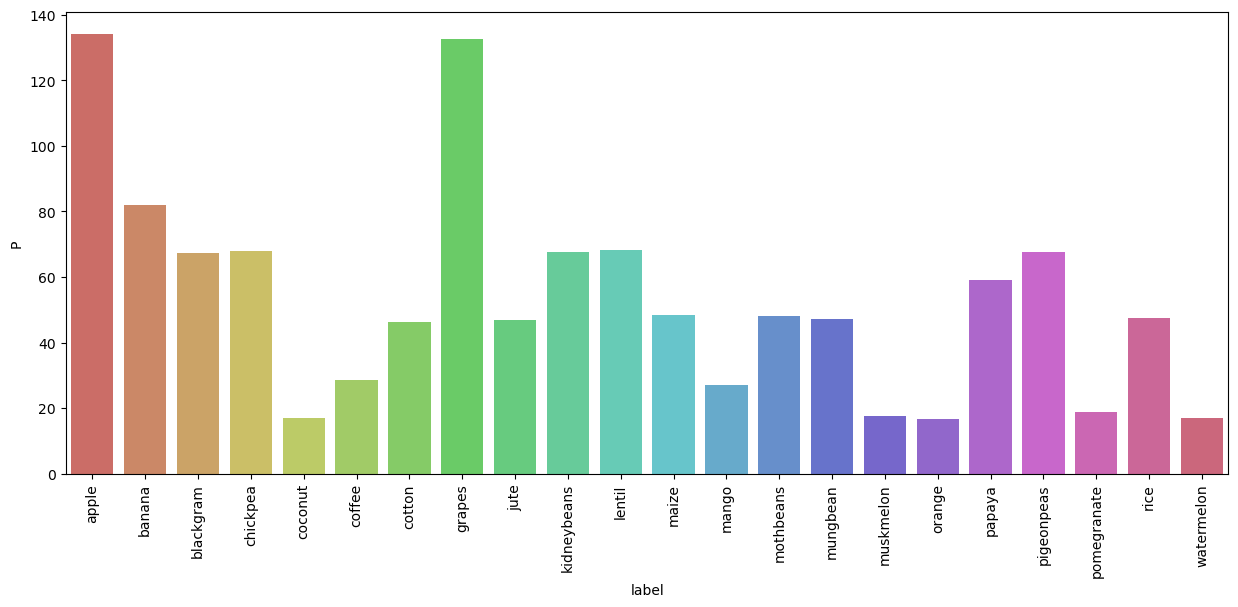

In [34]:
plt.figure(figsize=(15,6))
sns.barplot(y='P',x='label',data=crop_summary_new,palette='hls')
plt.xticks(rotation=90)
plt.show()

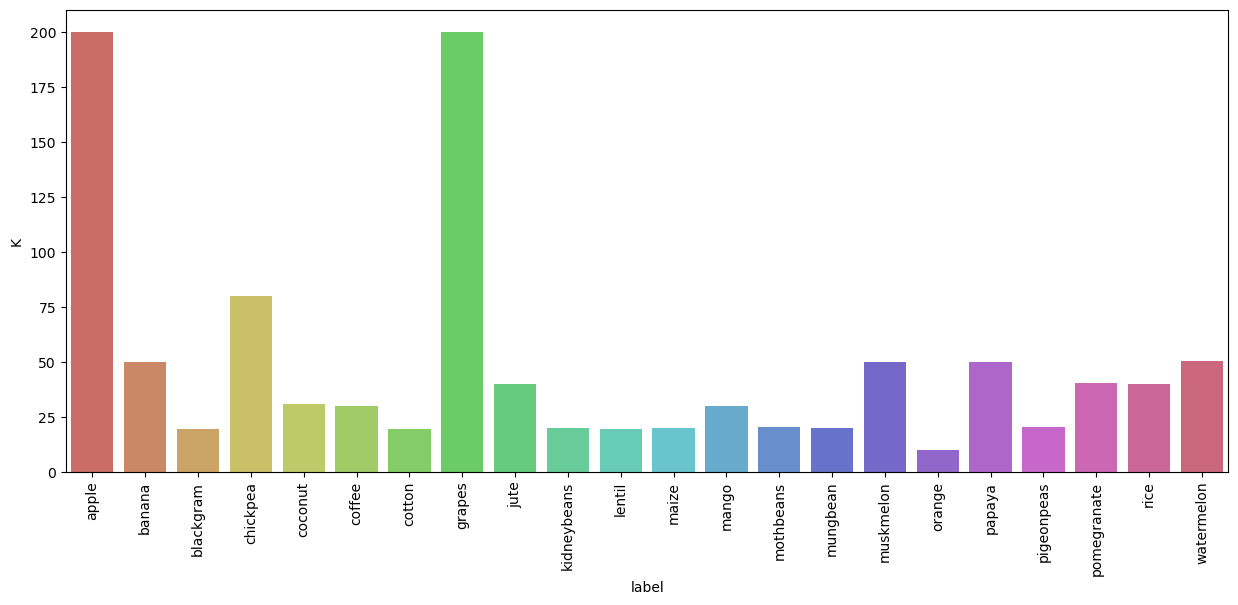

In [35]:
plt.figure(figsize=(15,6))
sns.barplot(y='K',x='label',data=crop_summary_new,palette='hls')
plt.xticks(rotation=90)
plt.show()

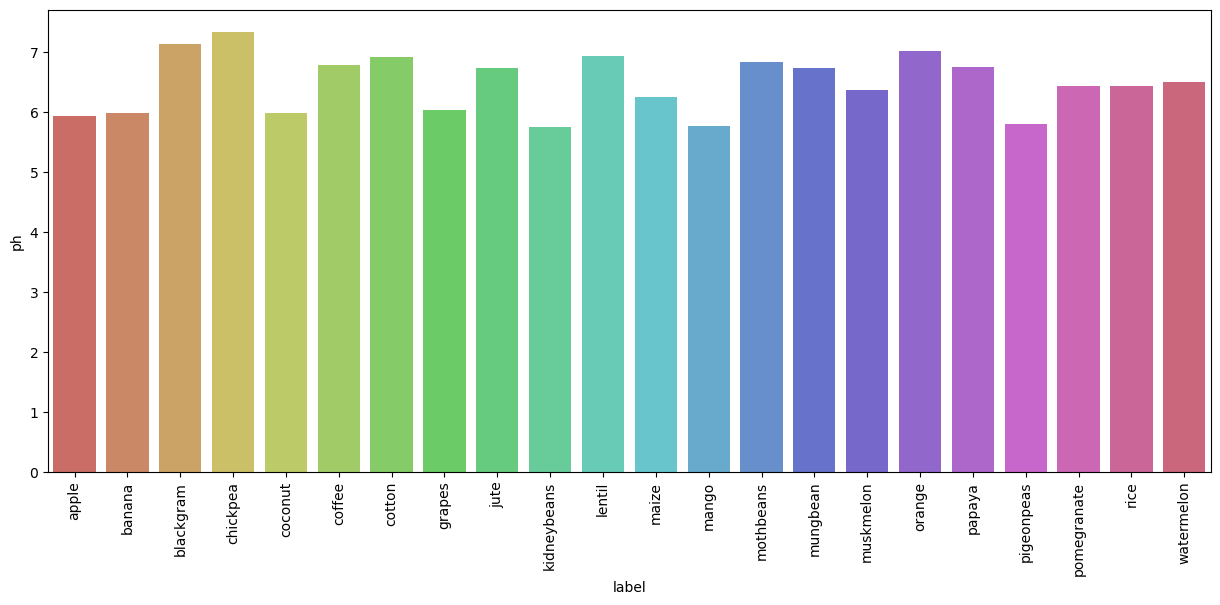

In [36]:
plt.figure(figsize=(15,6))
sns.barplot(y='ph',x='label',data=crop_summary_new,palette='hls')
plt.xticks(rotation=90)
plt.show()

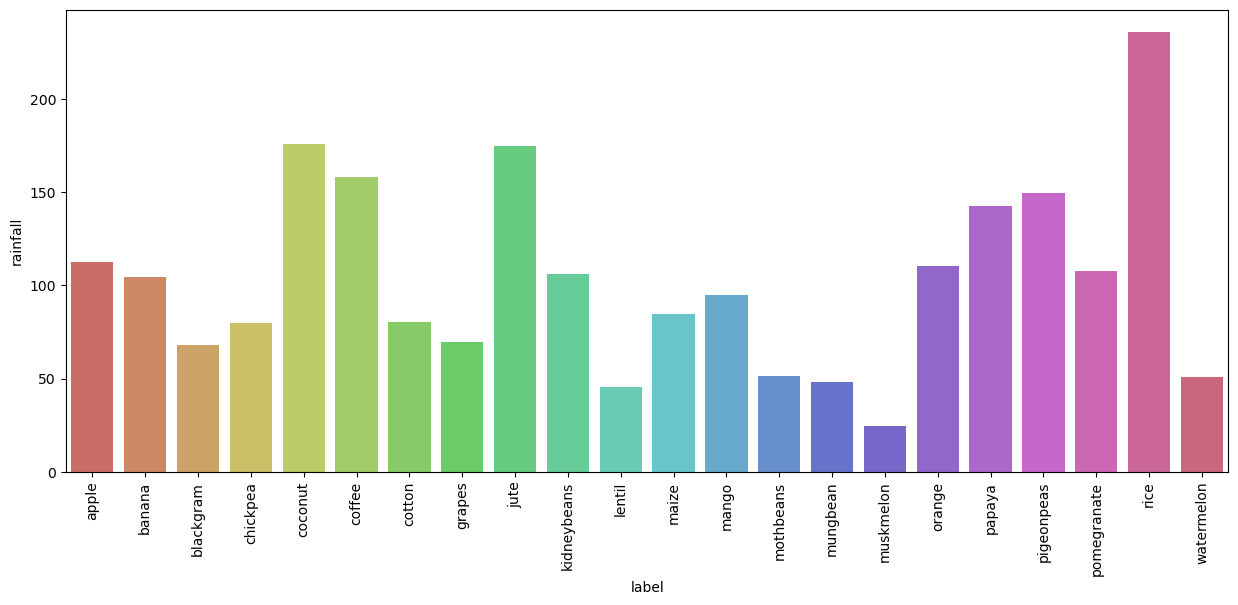

In [37]:
plt.figure(figsize=(15,6))
sns.barplot(y='rainfall',x='label',data=crop_summary_new,palette='hls')
plt.xticks(rotation=90)
plt.show()

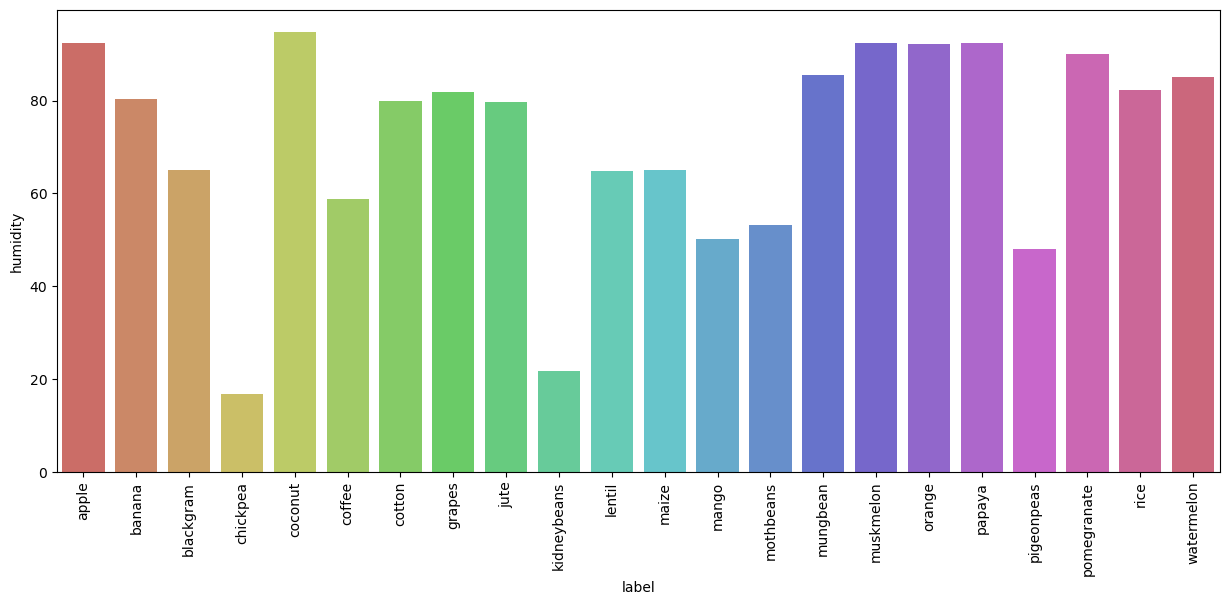

In [38]:
plt.figure(figsize=(15,6))
sns.barplot(y='humidity',x='label',data=crop_summary_new,palette='hls')
plt.xticks(rotation=90)
plt.show()

# <center> to differentiate crops on basis of Nitrogen Required

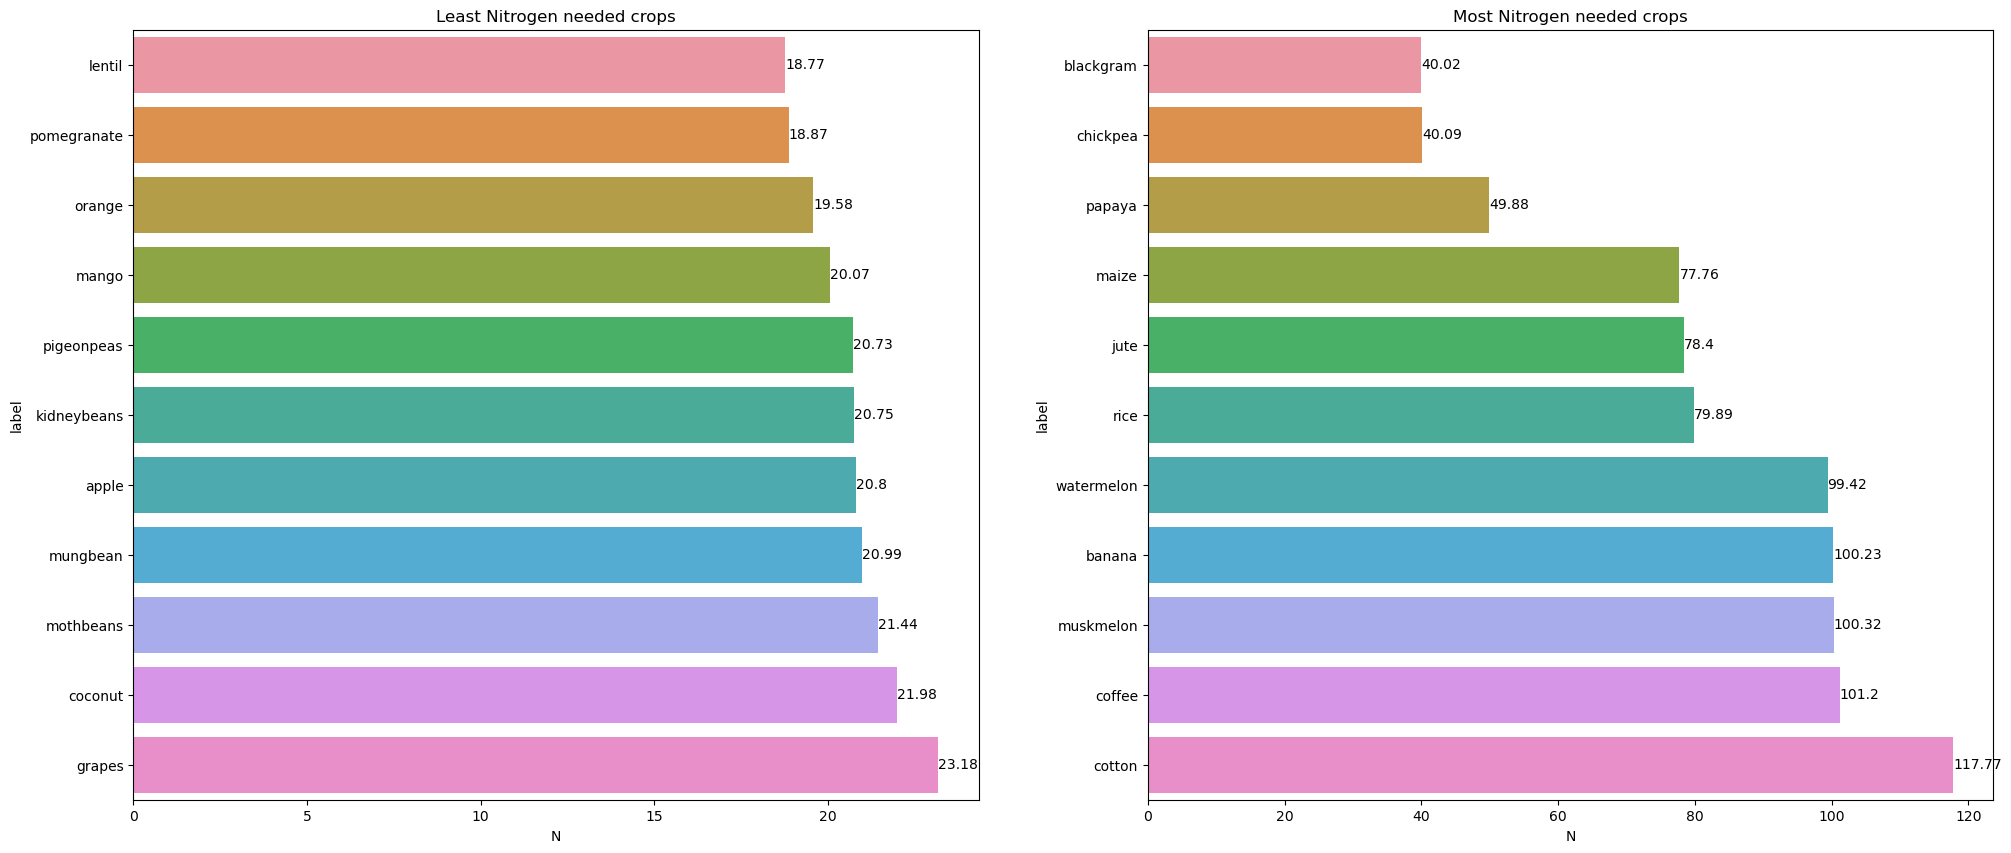

In [39]:
crop_summary_sorted=crop_mean_data.sort_values(by='N',ascending=True)
Nleast={"x":crop_summary_sorted["N"][0:11].index,
       "y":crop_summary_sorted["N"][0:11]}
Nmost={"x":crop_summary_sorted["N"][-11:].index,
       "y":crop_summary_sorted["N"][-11:]}
plt.figure(figsize=(24,10))
plt.subplot(1, 2, 1)
Nl=sns.barplot(x=Nleast["y"],y=Nleast["x"],orient='h')
for i in Nl.containers:
    Nl.bar_label(i,)
plt.title('Least Nitrogen needed crops')
plt.subplot(1, 2, 2)
Nm=sns.barplot(x=Nmost["y"],y=Nmost["x"],orient='h')
plt.title('Most Nitrogen needed crops')
for i in Nm.containers:
    Nm.bar_label(i,)

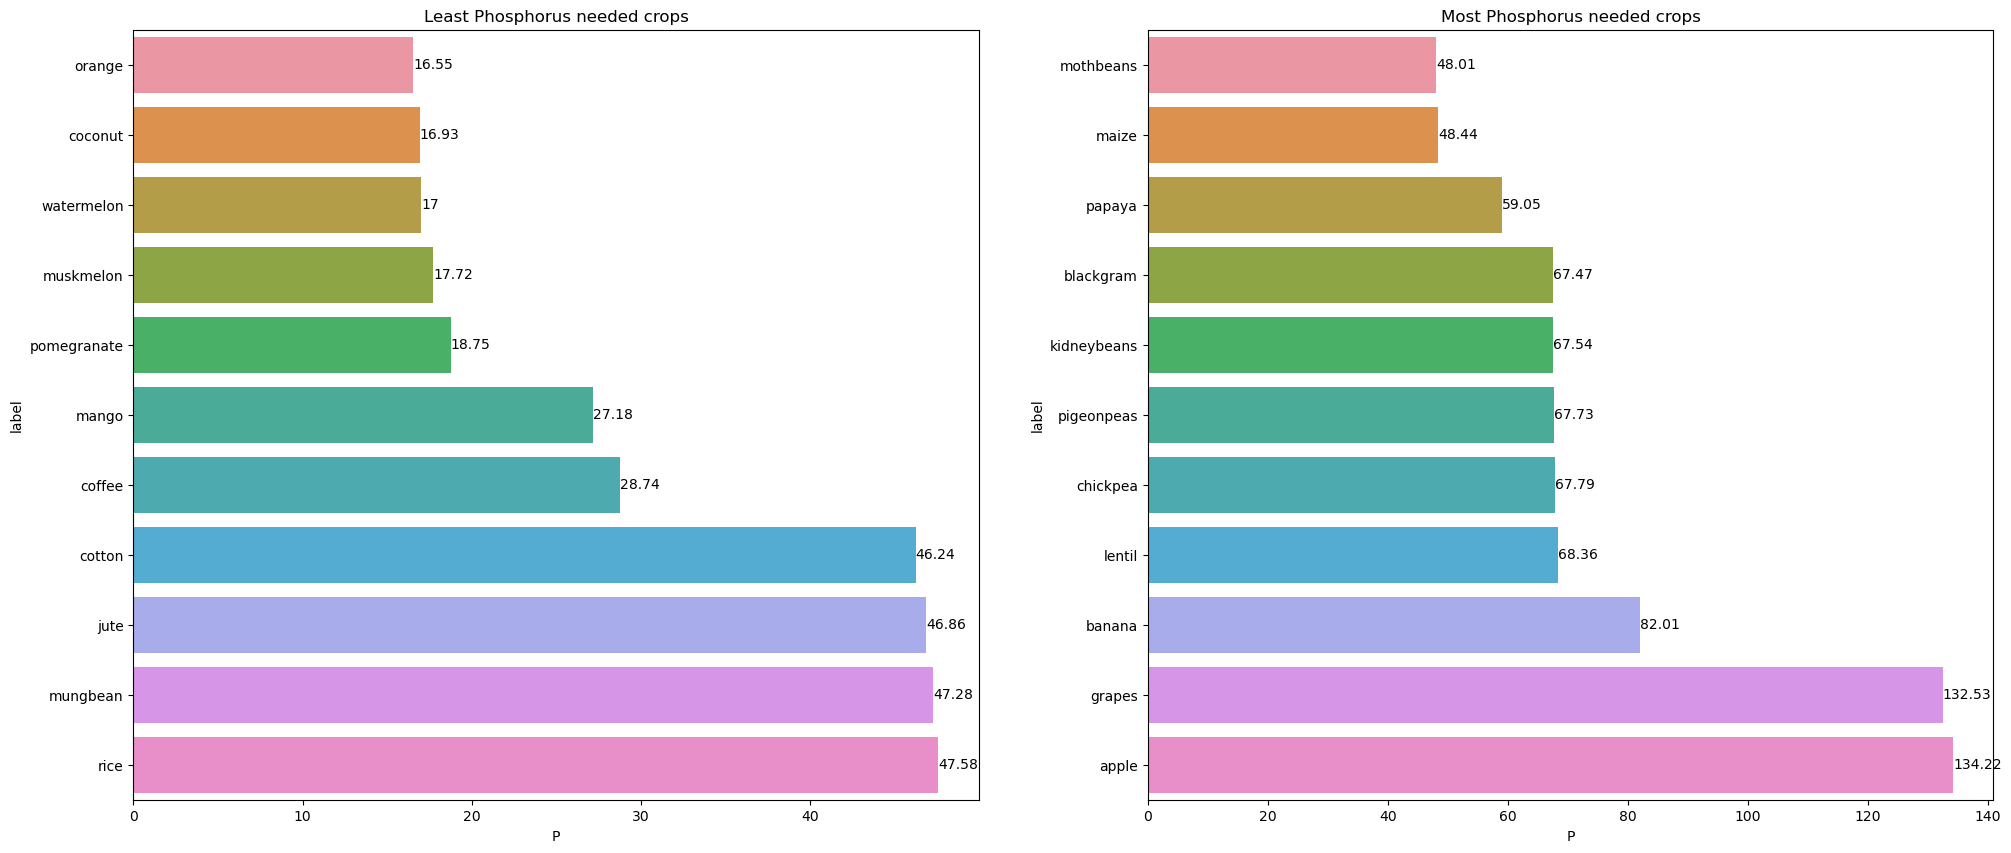

In [40]:
crop_summary_sorted=crop_mean_data.sort_values(by='P',ascending=True)
Pleast={"x":crop_summary_sorted["P"][0:11].index,
       "y":crop_summary_sorted["P"][0:11]}
Pmost={"x":crop_summary_sorted["P"][-11:].index,
       "y":crop_summary_sorted["P"][-11:]}
plt.figure(figsize=(24,10))
plt.subplot(1, 2, 1)
Pl=sns.barplot(x=Pleast["y"],y=Pleast["x"],orient='h')
for i in Pl.containers:
    Pl.bar_label(i,)
plt.title('Least Phosphorus needed crops')
plt.subplot(1, 2, 2)
Pm=sns.barplot(x=Pmost["y"],y=Pmost["x"],orient='h')
plt.title('Most Phosphorus needed crops')
for i in Pm.containers:
    Pm.bar_label(i,)

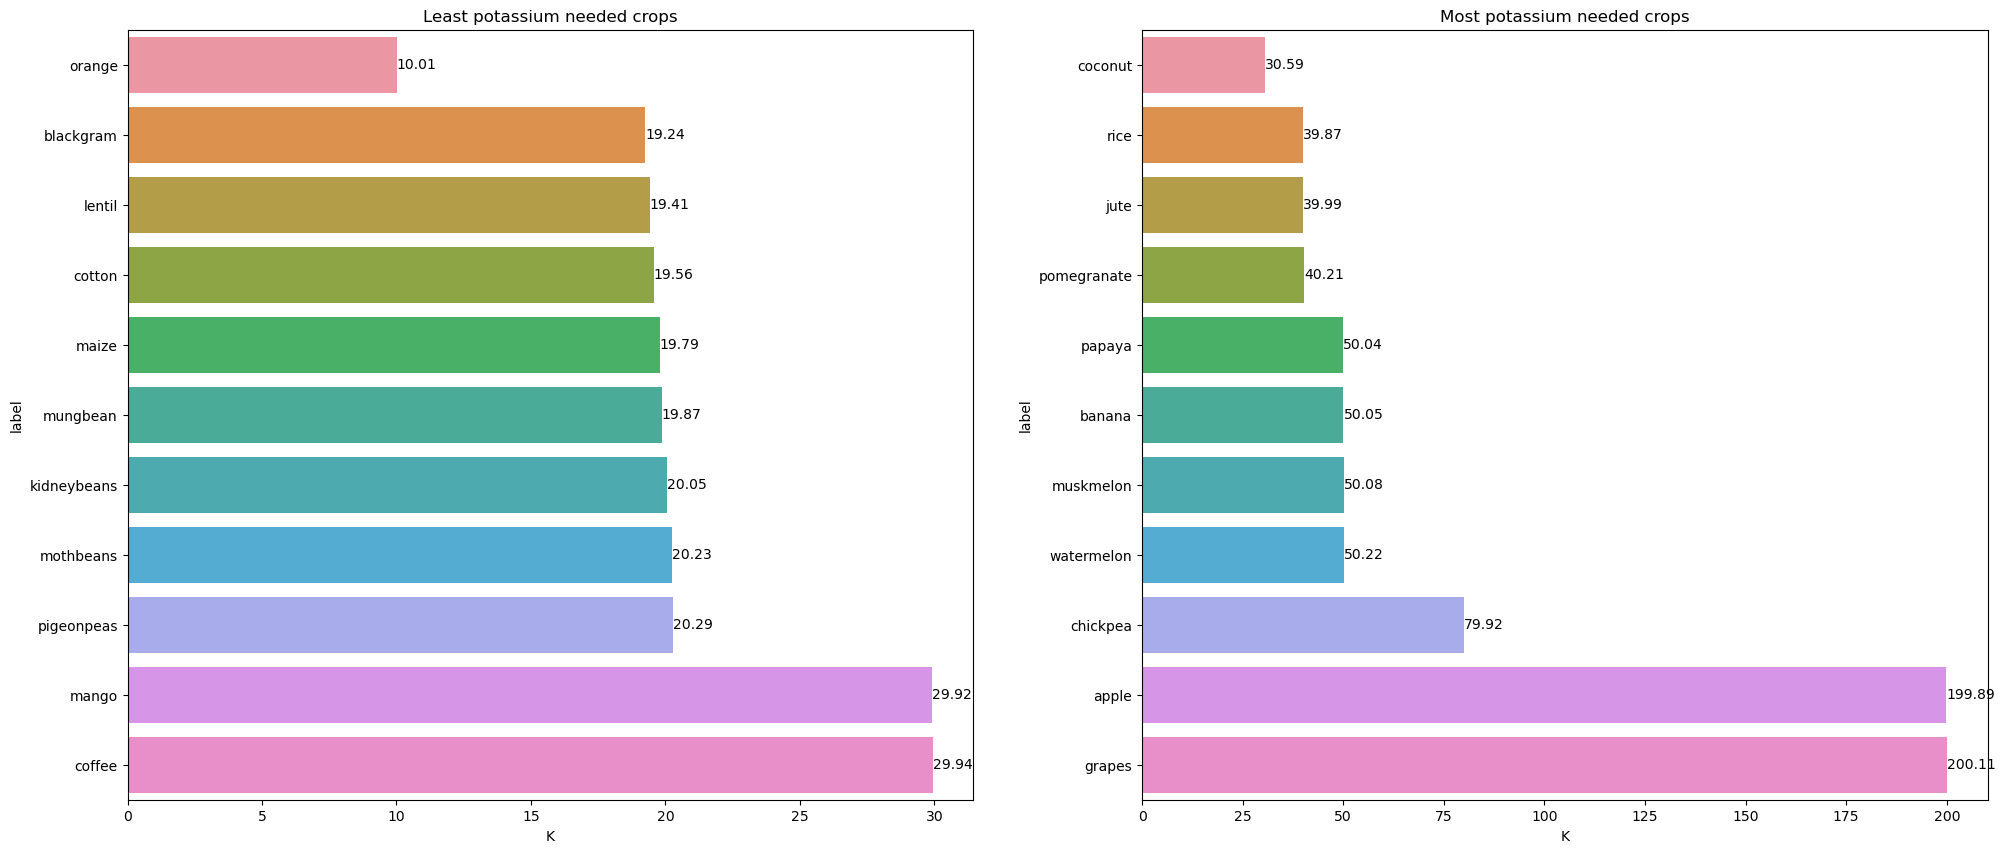

In [41]:
crop_summary_sorted=crop_mean_data.sort_values(by='K',ascending=True)
Kleast={"x":crop_summary_sorted["K"][0:11].index,
       "y":crop_summary_sorted["K"][0:11]}
Kmost={"x":crop_summary_sorted["K"][-11:].index,
       "y":crop_summary_sorted["K"][-11:]}
plt.figure(figsize=(24,10))
plt.subplot(1, 2, 1)
Kl=sns.barplot(x=Kleast["y"],y=Kleast["x"],orient='h')
for i in Kl.containers:
    Kl.bar_label(i,)
plt.title('Least potassium needed crops')
plt.subplot(1, 2, 2)
Km=sns.barplot(x=Kmost["y"],y=Kmost["x"],orient='h')
plt.title('Most potassium needed crops')
for i in Km.containers:
    Km.bar_label(i,)

<AxesSubplot:>

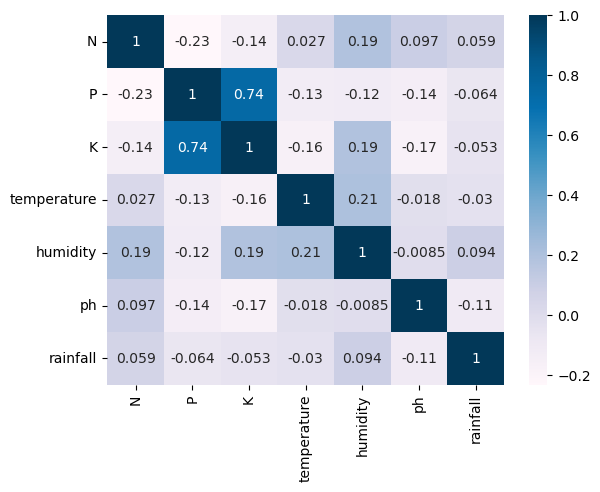

In [42]:
sns.heatmap(df.corr(),annot=True,cmap="PuBu")

# classic train test split

## 1. clean and adjust data as necessary for X and y
## 2. split data in train and test for X and y
## 3. fit/train scaler on training X data
## 4. scale X test data
## 5. Create model
## 6. Fit/train model on X train data
## 7. Evaluate model on X test data 
## 8. Adjust parameters as Necessary and repeat step 6 and 7

In [43]:
df["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

# independent parameters taken as x
1. N
2. P
3. K
4. temperature
5. humidity
6. ph
7. rainfall	

# dependent parameters taken as y
1. label

### Seperating features and target labels and  Splitting into train and test data

In [44]:
features = df.drop('label',axis=1)
target = df['label']
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.33,shuffle=True,random_state=0)

In [45]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1829,33,14,35,27.148653,96.663552,6.027707,149.243350
1051,116,81,55,26.423133,83.699504,5.915546,95.123221
347,13,72,21,24.321166,21.027867,5.821194,60.275525
1576,30,137,200,22.914300,90.704756,5.603413,118.604465
121,99,50,15,18.147101,71.094453,5.573286,88.077537
...,...,...,...,...,...,...,...
1033,102,71,48,28.654563,79.286937,5.695268,102.463378
1731,34,68,51,27.347349,94.177567,6.687088,40.351531
763,35,64,15,28.474423,63.536045,6.500145,69.527441
835,39,65,23,25.434598,69.126134,7.685959,41.026829


In [46]:
y_train

1829        coconut
1051         banana
347     kidneybeans
1576          apple
121           maize
           ...     
1033         banana
1731         papaya
763       blackgram
835          lentil
1653         orange
Name: label, Length: 1474, dtype: object

In [47]:
X_test

,N,P,K,temperature,humidity,ph,rainfall
1320,105,14,50,26.214884,87.688398,6.419052,59.655908
1367,91,12,46,24.644585,85.499382,6.343943,48.312190
1291,14,121,203,9.724458,83.747656,6.158689,74.464111
264,52,73,79,17.257695,18.749440,7.840339,94.002872
728,32,66,17,34.946616,65.267740,7.162358,70.141514
...,...,...,...,...,...,...,...
1523,34,140,198,21.704170,93.440063,5.751707,115.178140
731,25,65,21,33.863512,68.592323,6.880246,69.244641
1545,15,133,199,23.996862,91.610017,5.824779,117.610292
1358,91,7,52,25.078037,83.462305,6.405054,56.399629


In [48]:
y_test

1320     watermelon
1367     watermelon
1291         grapes
264        chickpea
728       blackgram
           ...     
1523          apple
731       blackgram
1545          apple
1358     watermelon
383     kidneybeans
Name: label, Length: 726, dtype: object

# <center>MODEL TRAINING
# <center>("logistic regression algorithm")

In [49]:
from sklearn import linear_model

In [50]:
model1=linear_model.LogisticRegression()

In [51]:
model1.fit(X_train,y_train)

C:\Users\univa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# convergence error

## i.e. failed to minimize the error

### increase the iterations or scale data

In [52]:
model2=linear_model.LogisticRegression(max_iter=9000)

In [53]:
model2.fit(X_train,y_train)

C:\Users\univa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=9000)

# scaling the data

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.fit_transform(X_test)

In [55]:
model2=linear_model.LogisticRegression()
model2.fit(scaled_X_train,y_train)

LogisticRegression()

In [56]:
pred_opt=model2.predict(scaled_X_test)

# to check score

In [57]:
from sklearn.metrics import accuracy_score
lgpred=accuracy_score(y_test, pred_opt)

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
cm=confusion_matrix(y_test,pred_opt)
cm

array([[31,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 31,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 28,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 25,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  6,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 30,  0,  0,

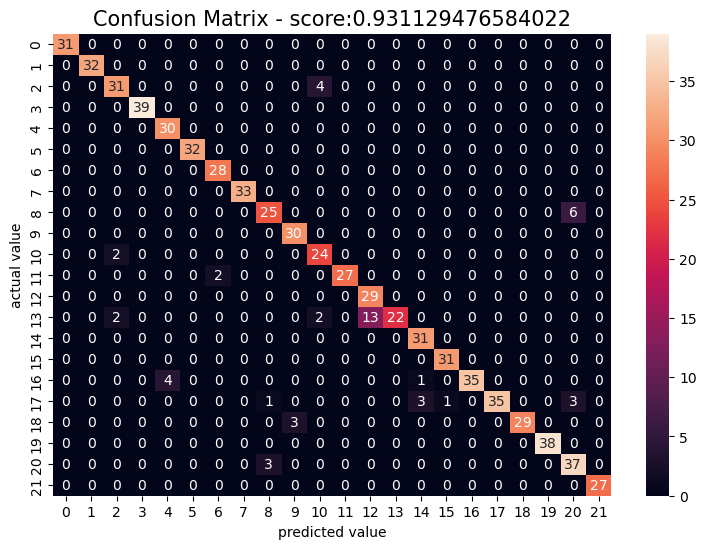

In [60]:
plt.figure(figsize=(9,6))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted value")
plt.ylabel("actual value")
all_sample_title = 'Confusion Matrix - score:'+str(lgpred)
plt.title(all_sample_title, size = 15);

# <center>("decision trees algorithm")

In [61]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from sklearn import metrics


In [62]:
dtree=DecisionTreeClassifier(criterion="entropy",random_state=0)
fitted_data=dtree.fit(X_train,y_train)
predictiontree=dtree.predict(X_test)

In [63]:
dot_data=export_graphviz(dtree,out_file=None,feature_names=['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall'],class_names=target)
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("agri.pdf")

True

In [64]:
y_train_predd=dtree.predict(X_train)
y_test_predd=dtree.predict(X_test)

In [65]:
cmtrain=confusion_matrix(y_train,y_train_predd)

In [66]:
cmtest=confusion_matrix(y_test,y_test_predd)

In [67]:
dtreepred = metrics.accuracy_score(y_test, y_test_predd)

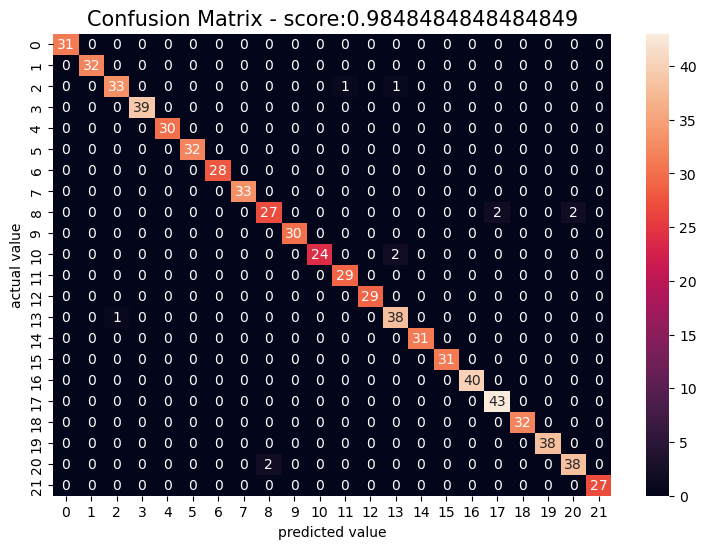

In [68]:
plt.figure(figsize=(9,6))
sns.heatmap(cmtest,annot=True)
plt.xlabel("predicted value")
plt.ylabel("actual value")
all_sample_title = 'Confusion Matrix - score:'+str(dtreepred)
plt.title(all_sample_title, size = 15);

In [69]:
print(f"the accurarcy score of Logistic regression is {lgpred}")
print(f"the accurarcy score of decision tree algo is {dtreepred}")

the accurarcy score of Logistic regression is 0.931129476584022
the accurarcy score of decision tree algo is 0.9848484848484849


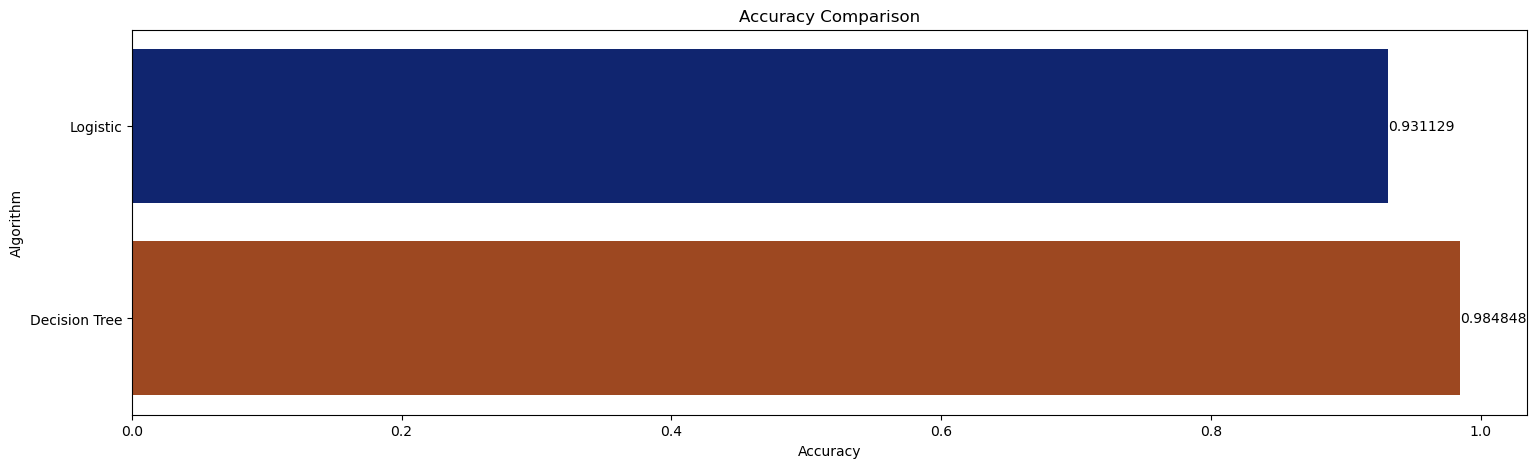

In [70]:
acc=[lgpred,dtreepred]
y=["Logistic","Decision Tree"]
plt.figure(figsize=[18,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
pt=sns.barplot(x = acc,y = y,palette='dark')
for i in pt.containers:
    pt.bar_label(i,)


# <center> CLASSIFICATION REPORT

# Logistic Regression

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_opt))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        32
   blackgram       0.89      0.89      0.89        35
    chickpea       1.00      1.00      1.00        39
     coconut       0.88      1.00      0.94        30
      coffee       1.00      1.00      1.00        32
      cotton       0.93      1.00      0.97        28
      grapes       1.00      1.00      1.00        33
        jute       0.86      0.81      0.83        31
 kidneybeans       0.91      1.00      0.95        30
      lentil       0.80      0.92      0.86        26
       maize       1.00      0.93      0.96        29
       mango       0.69      1.00      0.82        29
   mothbeans       1.00      0.56      0.72        39
    mungbean       0.89      1.00      0.94        31
   muskmelon       0.97      1.00      0.98        31
      orange       1.00      0.88      0.93        40
      papaya       1.00    

# Decision tree

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predd))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        32
   blackgram       0.97      0.94      0.96        35
    chickpea       1.00      1.00      1.00        39
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        32
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        33
        jute       0.93      0.87      0.90        31
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      0.92      0.96        26
       maize       0.97      1.00      0.98        29
       mango       1.00      1.00      1.00        29
   mothbeans       0.93      0.97      0.95        39
    mungbean       1.00      1.00      1.00        31
   muskmelon       1.00      1.00      1.00        31
      orange       1.00      1.00      1.00        40
      papaya       0.96    

# <center> Predicting the values

In [73]:
new_imput=[[34,140,198,21.704170,93.440063,5.751707,115.178140]]

In [74]:
dtree.predict(new_imput)

C:\Users\univa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['apple'], dtype=object)

In [75]:
model2.predict(new_imput)

array(['apple'], dtype=object)